In [1]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import plotly.graph_objects as go

# Visualize Using Transformation Matrix to Move Points

In [2]:
def draw_simple_transform(fig, homo_trans, points = None):
    """fig = plotly figure object
       homo_trans = homogenous transformation matrix (4x4)
       points = points coordinates in origonal frame"""

    # Isolating the transformation from the homogeneous matrix
    # This is the starting point for the second xyz frame
    x0 = homo_trans[0,3]
    y0 = homo_trans[1,3]
    z0 = homo_trans[2,3]
    # print(homo_trans)
#     x1, y1, z1 =  np.eye(3) @ np.linalg.pinv(homo_trans[:3,:3])
    # Multiply identity matrix by upper left 3x3 matrix 
    x1, y1, z1 =  np.eye(3) @ homo_trans[:3,:3]
    # print(x1,y1,z1)
    x1 += homo_trans[0,-1]
    y1 += homo_trans[1,-1]
    z1 += homo_trans[2,-1]
    #old axis
    fig.add_trace(go.Scatter3d(x=[0, 1], y=[0, 0], z=[0, 0], mode='lines', line=dict(color='rgba(255, 0, 0, 0.2)', width=5)))
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, 1], z=[0, 0], mode='lines', line=dict(color='rgba(0, 255, 0, 0.2)', width=5)))
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, 0], z=[0, 1], mode='lines', line=dict(color='rgba(0, 0, 255, 0.2)', width=5)))
    #new x
    fig.add_trace(go.Scatter3d(x=[x0, x1[0]], y=[y0, y1[0]], z=[z0, z1[0]], mode='lines', line=dict(color='red', width=5)))
    fig.add_trace(go.Scatter3d(x=[x0, x1[1]], y=[y0, y1[1]], z=[z0, z1[1]], mode='lines', line=dict(color='green', width=5)))
    fig.add_trace(go.Scatter3d(x=[x0, x1[2]], y=[y0, y1[2]], z=[z0, z1[2]], mode='lines', line=dict(color='blue', width=5)))

    if points is not None:
        #apply matrix multiplication
        new_points = np.append(points, np.ones([len(points),1]), axis = 1) @ homo_trans.T
        
        #draw old points
        fig.add_trace(go.Scatter3d(
            x=points[:,0],
            y=points[:,1],
            z=points[:,2],
            mode='markers',
            marker=dict(
                size=5,          # Size of the points
                color='rgba(32, 32, 32, 0.4)',       # Color of the points
                opacity=0.8       # Opacity of the points
            )
        ))
        #draw new points
        fig.add_trace(go.Scatter3d(
            x=new_points[:,0],
            y=new_points[:,1],
            z=new_points[:,2],
            mode='markers',
            marker=dict(
                size=5,          # Size of the point
                color='rgba(32, 32, 32, 1.)',       # Color of the point
                opacity=0.8       # Opacity of the point
            )
        ))
        return new_points
    

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.



 rotation matrix (3x3) 
 [[ 0.87758256 -0.47942554  0.        ]
 [ 0.47942554  0.87758256  0.        ]
 [ 0.          0.          1.        ]] 


 translation vector (3x1) 
 [[0.2 1.  1.5]]
[[ 0.87758256 -0.47942554  0.          0.        ]
 [ 0.47942554  0.87758256  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]

 homogenous transformation matrix (4x4) 
 [[ 0.87758256 -0.47942554  0.          0.2       ]
 [ 0.47942554  0.87758256  0.          1.        ]
 [ 0.          0.          1.          1.5       ]
 [ 0.          0.          0.          1.        ]] 



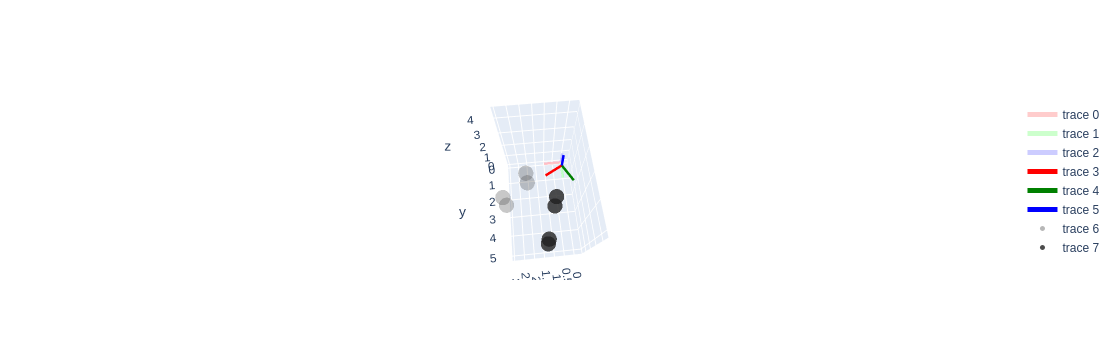

test point before: [2 2 3]
test point after transformation: [0.99631405 3.7140162  4.5       ]


In [6]:
# Create a 3D figure
fig = go.Figure()

#initialize 3x3 rotation matrix
euler_angles = [0., 0., 0.5] #rotation about xaxis, yaxis, zaxis
rotm = R.from_euler('xyz', euler_angles).as_matrix()
print("\n rotation matrix (3x3) \n", rotm, "\n")

#initialize translation vector
# trans_vec = np.array([[0., 0., 0]]) #[x, y, z]
trans_vec = np.array([[0.2, 1., 1.5]]) #[x, y, z]
print("\n translation vector (3x1) \n", trans_vec)

#resize rotation matrix to 4x4 so it can be used with homogenous cooridnates
homo_trans = np.append(np.append(rotm, np.zeros([3,1]), axis = 1), np.array([[0,0,0,1]]), axis = 0)
print(homo_trans)
#update homo_trans to include translation as well
homo_trans[:3,-1] = trans_vec
print("\n homogenous transformation matrix (4x4) \n", homo_trans ,"\n")

#initialize test points
test_points = np.array([[2,2,3], [2,2,2], [3,3,3], [3,3,2]])

#run our function
new_point_locations = draw_simple_transform(fig, homo_trans, points = test_points)
fig.show()

print("test point before:", test_points[0])
print("test point after transformation:", new_point_locations[0,:3])

# Visualize Subsequent Transformations

In [48]:
def draw_frame(fig, homo_trans, alpha = 1.):
    """fig = plotly figure object
       homo_trans = homogenous transformation matrix (4x4)"""

    x0 = homo_trans[0,3]
    y0 = homo_trans[1,3]
    z0 = homo_trans[2,3]
    x1, y1, z1 =  np.eye(3) @ homo_trans[:3,:3]
    x1 += homo_trans[0,-1]
    y1 += homo_trans[1,-1]
    z1 += homo_trans[2,-1]
    fig.add_trace(go.Scatter3d(x=[x0, x1[0]], y=[y0, y1[0]], z=[z0, z1[0]], mode='lines', line=dict(color='rgba(255, 0, 0, ' +str(alpha) + ')', width=5)))
    fig.add_trace(go.Scatter3d(x=[x0, x1[1]], y=[y0, y1[1]], z=[z0, z1[1]], mode='lines', line=dict(color='rgba(0, 255, 0, ' +str(alpha) + ')', width=5)))
    fig.add_trace(go.Scatter3d(x=[x0, x1[2]], y=[y0, y1[2]], z=[z0, z1[2]], mode='lines', line=dict(color='rgba(0, 0, 255, ' +str(alpha) + ')', width=5)))


 homogenous transformation matrix (4x4) for pose 0 
 [[ 0.87758256 -0.47942554  0.          0.2       ]
 [ 0.47942554  0.87758256  0.          1.        ]
 [ 0.          0.          1.          1.5       ]
 [ 0.          0.          0.          1.        ]] 



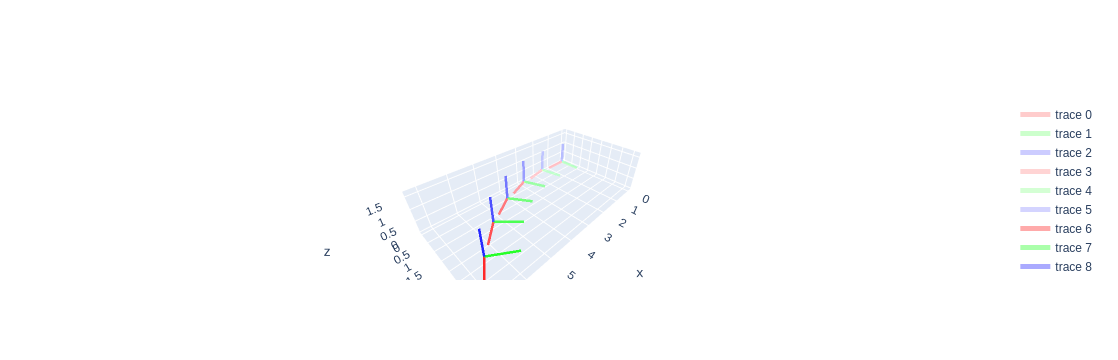

In [49]:
# Create a 3D figure
fig = go.Figure()
fig.update_layout(
    scene=dict(
        aspectmode='data'  # ensures all axes are scaled equally
    )
)

#initialize 3x3 rotation matrix
euler_angles = [0.,0.,0.] #rotation about xaxis, yaxis, zaxis
# print("\n rotation matrix (3x3) \n", rotm, "\n")

#initialize translation vector
trans_vec = np.array([[0., 0., 0]]) #[x, y, z]
# print("\n translation vector (3x1) \n", trans_vec)

#resize rotation matrix to 4x4 so it can be used with homogenous cooridnates
#update homo_trans to include translation as well
print("\n homogenous transformation matrix (4x4) for pose 0 \n", homo_trans ,"\n")


runLen = 5

draw_frame(fig, np.eye(4), alpha = 1/runLen)
homo_trans = np.eye(4)

for i in range(runLen):
    #update translation
    new_trans_step = np.array([1.5, 0, .1])
    
    #update rotation
    new_euler_angle_step = np.array([0, -0.01, 0.2])
    new_rotm_step = R.from_euler('xyz', new_euler_angle_step).as_matrix()
    
    #update homo_trans_step
    homo_trans_step = np.append(np.append(new_rotm_step, np.zeros([3,1]), axis = 1), np.array([[0,0,0,1]]), axis = 0)
    homo_trans_step[:3,-1] = new_trans_step
    
    
    #update overall transform
    homo_trans = homo_trans @ homo_trans_step
    
#     print("\n overall homogenous transformation matrix (4x4) for pose", i + 1, "\n", homo_trans ,"\n")
#     print("\n just since the last frame \n", homo_trans_step, "\n")
    
    #add to figure
    draw_frame(fig, homo_trans, (i+1)/(runLen+1))

fig.show()